<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_disaster.csv to titanic_disaster.csv


In [ ]:
import pandas as pd
import io

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [ ]:
def load_data():
  datatitanic = pd.read_csv(io.StringIO(uploaded['titanic_disaster.csv'].decode('utf-8')))
  return datatitanic

In [ ]:
datatitanic = load_data()

In [ ]:
datatitanic.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [ ]:
datatitanic_isna = datatitanic[datatitanic.isna().any(axis = 1)]

In [ ]:
datatitanic_isna.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0             1         0       3  ...   7.2500   NaN         S
2             3         1       3  ...   7.9250   NaN         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
12           13         0       3  ...   8.0500   NaN         S
13           14         0       3  ...  31.2750   NaN         S
14           15         0       3  ...   7.8542   NaN         S

[10 rows x 12 columns]

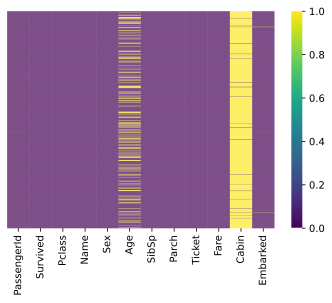

In [ ]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic_isna.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')

Cột Age thiếu dữ liệu nhiều
Cột Cabin thiếu dữ liệu hầu như gần hết
Cột Embarked chỉ thiếu dữ liệu ở 2 dòng

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName

In [ ]:
datatitanic[['firstName', 'secondName']] = datatitanic['Name'].str.split(',', expand = True)
datatitanic.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 14 columns]

In [ ]:
datatitanic = datatitanic.drop('Name', axis = 1)
datatitanic.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

1. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [ ]:
datatitanic['Sex'].replace({'male': 'M', 'female': 'F'}, inplace = True)

In [ ]:
datatitanic.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

2. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

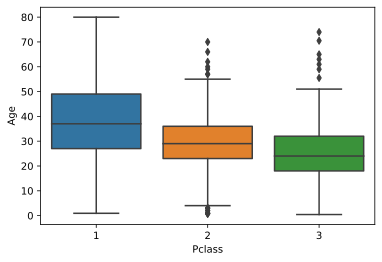

In [ ]:
sns.boxplot(y = 'Age', x = 'Pclass', data = datatitanic)

In [ ]:
pclass1 = datatitanic.loc[datatitanic['Pclass'] == 1]

In [ ]:
pclass1['Age'].fillna(round(pclass1['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
pclass1.head(10)

PassengerId  ...                                   secondName
1             2  ...   Mrs. John Bradley (Florence Briggs Thayer)
3             4  ...           Mrs. Jacques Heath (Lily May Peel)
6             7  ...                                Mr. Timothy J
11           12  ...                              Miss. Elizabeth
23           24  ...                         Mr. William Thompson
27           28  ...                        Mr. Charles Alexander
30           31  ...                                Don. Manuel E
31           32  ...        Mrs. William Augustus (Marie Eugenie)
34           35  ...                             Mr. Edgar Joseph
35           36  ...                          Mr. Alexander Oskar

[10 rows x 13 columns]

In [ ]:
pclass2 = datatitanic.loc[datatitanic['Pclass'] == 2]

In [ ]:
pclass2['Age'].fillna(round(pclass2['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
pclass2.head(10)

PassengerId  ...                                         secondName
9            10  ...                        Mrs. Nicholas (Adele Achem)
15           16  ...                            Mrs. (Mary D Kingcome) 
17           18  ...                                 Mr. Charles Eugene
20           21  ...                                       Mr. Joseph J
21           22  ...                                       Mr. Lawrence
33           34  ...                                       Mr. Edward H
41           42  ...   Mrs. William John Robert (Dorothy Ann Wonnacott)
43           44  ...                    Miss. Simonne Marie Anne Andree
53           54  ...             Mrs. Lizzie (Elizabeth Anne Wilkinson)
56           57  ...                                        Miss. Emily

[10 rows x 13 columns]

In [ ]:
pclass3 = datatitanic.loc[datatitanic['Pclass'] == 3]

In [ ]:
pclass3['Age'].fillna(round(pclass3['Age'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
pclass3.head(10)

PassengerId  ...                                 secondName
0             1  ...                            Mr. Owen Harris
2             3  ...                                Miss. Laina
4             5  ...                          Mr. William Henry
5             6  ...                                  Mr. James
7             8  ...                      Master. Gosta Leonard
8             9  ...   Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10           11  ...                       Miss. Marguerite Rut
12           13  ...                          Mr. William Henry
13           14  ...                           Mr. Anders Johan
14           15  ...                Miss. Hulda Amanda Adolfina

[10 rows x 13 columns]

In [ ]:
for i in datatitanic['Pclass'].unique():
  if i == 1:
    datatitanic['Age'].fillna(round(pclass1['Age'].mean()), inplace = True)
  elif i == 2:
    datatitanic['Age'].fillna(round(pclass2['Age'].mean()), inplace = True)
  elif i == 3:
    datatitanic['Age'].fillna(round(pclass3['Age'].mean()), inplace = True)

In [ ]:
datatitanic.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(datatitanic.isna(),
            yticklabels = False,
            cbar = True,
            cmap = 'viridis')

1. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [ ]:
datatitanic.loc[(datatitanic['Age'] <= 12), 'Agegroup'] = 'Kid'
datatitanic.loc[(datatitanic['Age'] > 12) & (datatitanic['Age'] <= 18), 'Agegroup'] = 'Teen'
datatitanic.loc[(datatitanic['Age'] > 18) & (datatitanic['Age'] <= 60), 'Agegroup'] = 'Adult'
datatitanic.loc[(datatitanic['Age'] > 60), 'Agegroup'] = 'Older'

In [ ]:
datatitanic.head(10)

PassengerId  Survived  ...                                   secondName Agegroup
0            1         0  ...                              Mr. Owen Harris    Adult
1            2         1  ...   Mrs. John Bradley (Florence Briggs Thayer)    Adult
2            3         1  ...                                  Miss. Laina    Adult
3            4         1  ...           Mrs. Jacques Heath (Lily May Peel)    Adult
4            5         0  ...                            Mr. William Henry    Adult
5            6         0  ...                                    Mr. James    Adult
6            7         0  ...                                Mr. Timothy J    Adult
7            8         0  ...                        Master. Gosta Leonard      Kid
8            9         1  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Adult
9           10         1  ...                  Mrs. Nicholas (Adele Achem)     Teen

[10 rows x 14 columns]

2. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName

In [ ]:
datatitanic[['M', 'namePrefix', 'none']] = datatitanic['secondName'].str.split('.', expand = True)

In [ ]:
datatitanic = datatitanic.drop(['M', 'none'], axis = 1)
datatitanic.head(10)

PassengerId  Survived  ...  Agegroup                              namePrefix
0            1         0  ...     Adult                             Owen Harris
1            2         1  ...     Adult   John Bradley (Florence Briggs Thayer)
2            3         1  ...     Adult                                   Laina
3            4         1  ...     Adult           Jacques Heath (Lily May Peel)
4            5         0  ...     Adult                           William Henry
5            6         0  ...     Adult                                   James
6            7         0  ...     Adult                               Timothy J
7            8         0  ...       Kid                           Gosta Leonard
8            9         1  ...     Adult     Oscar W (Elisabeth Vilhelmina Berg)
9           10         1  ...      Teen                  Nicholas (Adele Achem)

[10 rows x 15 columns]

3. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [ ]:
datatitanic['familySize'] = 1 + datatitanic['SibSp'] + datatitanic['Parch']

In [ ]:
datatitanic.head(10)

PassengerId  Survived  ...                              namePrefix familySize
0            1         0  ...                             Owen Harris          2
1            2         1  ...   John Bradley (Florence Briggs Thayer)          2
2            3         1  ...                                   Laina          1
3            4         1  ...           Jacques Heath (Lily May Peel)          2
4            5         0  ...                           William Henry          1
5            6         0  ...                                   James          1
6            7         0  ...                               Timothy J          1
7            8         0  ...                           Gosta Leonard          5
8            9         1  ...     Oscar W (Elisabeth Vilhelmina Berg)          3
9           10         1  ...                  Nicholas (Adele Achem)          2

[10 rows x 16 columns]

4. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [ ]:
for i in datatitanic['familySize'].unique():
  if i == 0:
    datatitanic['Alone'] = 1
  else:
    datatitanic['Alone'] = 0

In [ ]:
datatitanic.head(10)

PassengerId  Survived  ...  familySize Alone
0            1         0  ...           2     0
1            2         1  ...           2     0
2            3         1  ...           1     0
3            4         1  ...           2     0
4            5         0  ...           1     0
5            6         0  ...           1     0
6            7         0  ...           1     0
7            8         0  ...           5     0
8            9         1  ...           3     0
9           10         1  ...           2     0

[10 rows x 17 columns]

5. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

In [ ]:
Cabin = datatitanic['Cabin']
datatitanic['typeCabin'] = 'Unknown'
for i in range(len(Cabin)):
  x = str(Cabin[i])
  if x != 'nan':
    datatitanic['typeCabin'][i] = x[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
datatitanic.head(10)

PassengerId  Survived  Pclass  ... familySize  Alone  typeCabin
0            1         0       3  ...          2      0    Unknown
1            2         1       1  ...          2      0          C
2            3         1       3  ...          1      0    Unknown
3            4         1       1  ...          2      0          C
4            5         0       3  ...          1      0    Unknown
5            6         0       3  ...          1      0    Unknown
6            7         0       1  ...          1      0          E
7            8         0       3  ...          5      0    Unknown
8            9         1       3  ...          3      0    Unknown
9           10         1       2  ...          2      0    Unknown

[10 rows x 18 columns]


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

1. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).

In [ ]:
import matplotlib as plt

In [ ]:
datasurvived = datatitanic.groupby(['Survived', 'Sex'])['Survived'].count().unstack().rename(index = {0:'thiet mang', 1:'song sot'})
datasurvived

Sex           F    M
Survived            
thiet mang   81  468
song sot    233  109

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f739ac6d9d0>,
      dtype=object)

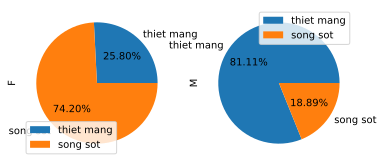

In [ ]:
datasurvived.plot.pie(subplots = True, autopct = '%.2f%%')

2. Trực quan thông tin hành khách sống sót (Survived) trên từng nhóm phân loại hành khách (Pclass).

In [ ]:
dataSurvived_Pclass = datatitanic.loc[datatitanic['Survived'] == 1].groupby(['Survived', 'Pclass'])[['Survived']].count().unstack().rename(index = {1: 'song sot'})
dataSurvived_Pclass

Survived         
Pclass          1   2    3
Survived                  
song sot      136  87  119

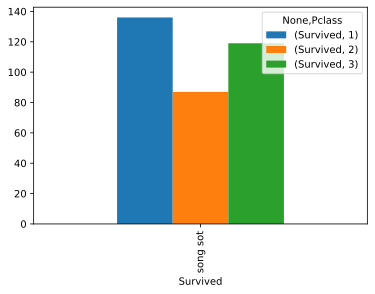

In [ ]:
dataSurvived_Pclass.plot.bar(stacked = False)
# pd.pivot_table(datatitanic.loc[datatitanic['Survived'] == 1].groupby(['Pclass'])['Survived'].agg(['count']), columns = ['Pclass']).plot.bar(stacked = False)

3. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác (Agegroup)

In [ ]:
dataSurvived_Pclass_Agegroup = datatitanic.loc[datatitanic['Survived'] == 1].groupby(['Pclass', 'Agegroup'])[['Survived']].count().unstack()
dataSurvived_Pclass_Agegroup

Survived               
Agegroup    Adult Kid Older Teen
Pclass                          
1             119   3     3   11
2              63  17     1    6
3              85  20     1   13

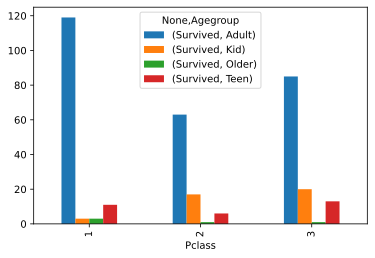

In [ ]:
dataSurvived_Pclass_Agegroup.plot.bar(stacked = False)

4. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm (familySize)đi cùng

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


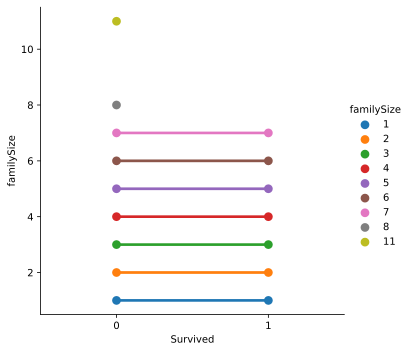

In [ ]:
sns.factorplot(x = 'Survived', y = 'familySize', hue = 'familySize', data = datatitanic)

5. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé (Fare)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


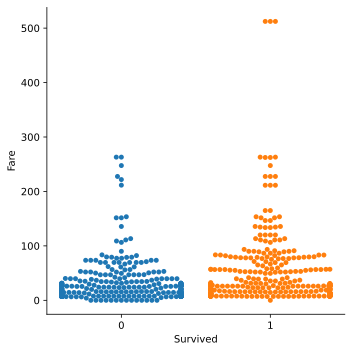

In [ ]:
sns.catplot(x = 'Survived', y ='Fare', kind = 'swarm', data = datatitanic)

6. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến (Embarked).

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


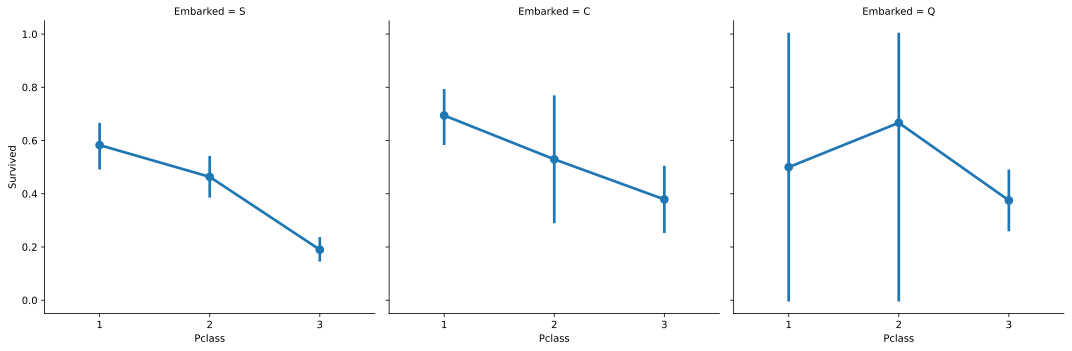

In [ ]:
sns.factorplot(x = 'Pclass', y = 'Survived', col = 'Embarked', data = datatitanic)